# A/B testing: Online shop subscription form redesign

In this project, we will analyze an A/B test to study the impact of a new subscription form design from an online shop 
selling handmade items and craft supplies.

The project will be devided in the following six parts:

1. [Can we improve the opt-in subscription rate by more than two times with the new subscription form design?](#1.-Can-we-improve-the-opt-in-subscription-rate-by-more-than-two-times-with-the-new-subscription-form-design?)
2. [Designing the experiment](#2.-Designing-the-experiment)   
3. [Data preparation](#3.-Data-preparation)
4. [Visualising the data](#4.-Visualising-the-data)
5. [Hypothesis testing](#5.-Hypothesis-testing)
6. [Conclusions](#6.-Conclusions)


## 1. Can we improve the opt-in subscription rate by more than two times with the new subscription form design? 


Our online shop marketing team wants to foster customer loyalty and drive sales via email amrketing.
They entice the shops webpage visitors to join their opt-in email subscription by placing an email form together with a discount offer as a stimulus on their landing page.

However, the marketing team was unhappy with the opt-in rate on their landing page: it was about 7% and they were losing many potential customers.
The team set the goal of increasing the opt-in rate to 15% and in order to achive this objective they decided to change the design of the opt-in subscription form from <em><strong>Desingn A</strong></em>  to <em><strong>Desingn B</strong></em>.   

The team decided that they needed to conduct an A/B test on the shop's webpage to find out whether the new subscription form design will result in the desirable opt-in rate increment.



<div>
<img src="Picture_1.png">
</div>



## 2. Designing the experiment


### Formulating a hypothesis

First, to ensure the correct interpretation of the results, we will formulate the Null and Alternative hypothesis we want to test.

Considering the fact that we don't know whether the new design will perform better or worse than the current design, we will use a <a href="https://en.wikipedia.org/wiki/One-_and_two-tailed_tests">**two-tailed test**</a>:

$$H_0: p = p_0$$
$$H_a: p \ne p_0$$

where $p$ and $p_0$ are the opt-in rates of the new and old design, respectively.
So in our null  hypotheis the opt-in rates of the new and the old designs are the same. The alternative hypothesis states that the opt-in are significantly different.

We will also set a **confidence level of 95%**:

$$\alpha = 0.05$$

So if the probability of observing a result as extreme or more ($p$-value) is lower than $\alpha$, we can reject the null hypothesis".
 
    
For our A/B test we will devide the webpage visitors in **two groups**:
* The visitors from the `control` group will be shown the old webpage design (Design A).
* The visitors from the `experimental` group will be shown the new design (Design B)

The opt-in rate will be captured with a binary variable:
* `0` - the visitor did not join to the opt-in subscription
* `1` - the visitor joined the subscription. 


### Finding the sample size of the control and experimental groups

Before conducting the test, we need to determine the optimal sample size of the control and experimental groups and for how long we need to conduct the test.
We want the size of our samples to be large enough to detect the defference between the two groups (we want to have a sufficient statistical power) and we want to run our experiment for reasonably short time.

We can use Power Analysis to find the required size of our samples.
Power Analysis considers the following factors:
* **($1 - \beta$) : the power of the test**, which represents the probability of correctly rejecting our null hypothesis (finding a statistically significant difference between the groups in our test when there is actually a difference). We will set this value to 80%.
    
* **$\alpha$: the significance level of the test**, which represents the probability of incorrectly rejecting the null hypothesis indicates (finding a statistically significant difference between the groups in our test when there is no actual difference). As we said before, we will set this value to 5%.
    
* **$\delta$: the effect size**, which represents how big is the difference between the opt-in rates that we expect.
    
Let's calculate the sample sizes that we need for our A/B test:

In [1]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import datetime

sns.set(font_scale = 2)

%matplotlib inline

In [2]:
# Calculating effect size based on our expected opt-in rates
eff_size = sms.proportion_effectsize(0.07, 0.15)    

# Calculate sample size needed
N_required = sms.NormalIndPower().solve_power(
    eff_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  

# Round up to next whole number  
N_required= ceil(N_required)                                                  

print("Our samples need to be of a size of:", N_required)

Our samples need to be of a size of: 233


So for our A/B test we need to have at least 233 observetions in each group.

### Finding the optimal duration of the experiment

Knowing the sample size, we need to calculate the number of days during which we will conduct the experiment on the shops webpage,

The shop's webpage has on average 38 visitors per day. To obtain the sufficient amount of visitors for our two groups, we need to conduct the experiment for 233*2/38 days, which is 12.26 days. 
Due to the variability in the page usage we decided to conduct the experiment during 15 days so we can ennsure that we sample enough number of visitor for our control and experimental groups.

We collected the experiment results in a data set. 
Let's inspect it!

## 3. Data preparation

In [3]:
#Reading the data
data=pd.read_csv('ab_data.csv', parse_dates=["timestamp"])

data.head()

,user_id,timestamp,group,page_design,subscribed
0,829015,2021-01-05 00:31:25.931433,control,Design_A,0
1,648683,2021-01-05 00:46:06.449401,control,Design_A,0
2,833966,2021-01-05 01:00:13.387265,experimental,Design_B,0
3,834548,2021-01-05 03:26:22.647058,experimental,Design_B,0
4,895078,2021-01-05 04:33:31.568611,control,Design_A,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      476 non-null    int64         
 1   timestamp    476 non-null    datetime64[ns]
 2   group        476 non-null    object        
 3   page_design  476 non-null    object        
 4   subscribed   476 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 18.7+ KB


In [5]:
n_days=(max(data["timestamp"])-min(data["timestamp"]))
print("Experiment started: ",min(data["timestamp"]))
print("Experiment ended: ", max(data["timestamp"]))
print("Experiment duration: ", n_days)

Experiment started:  2021-01-05 00:31:25.931433
Experiment ended:  2021-01-19 22:46:49.574987
Experiment duration:  14 days 22:15:23.643554


We ran the experiment for 15 days from **January the 5th 2021** to **January the 19th 2021** (both inclusive).

There are 476 rows in the DataFrame, each representing a user session, as well as 5 columns:
    
* `user_id` - indicating the user ID of each session
* `timestamp` - indicating the timestamp for the session
* `group` -indicating the group the user was assigned to {`control`, `ecperimental`}
* `page_design` - indicating the webpage design the user saw on that session {`Design_A`, `Design_B`}
* `subscribed` - indicating whether the user joined the opt-in subscription or not (binary, `0`=not subscribed, `1`=subscribed)


Let's make sure thet all the visitors from the control group were shown the old design of the page (Design A), and all the visitors from the experimental group saw the new design of the page (Design B).

In [6]:
# To checl if all the people from the control group saw the webpage design A,
# and all the people from the experimental group saw the new design B

pd.crosstab(data['group'], data['page_design'])

page_design,Design_A,Design_B
group,,
control,238,0
experimental,0,238


We can see that each of the two designs of the webpage  were shown to the same number of visitors - 238.

Let's check if there are any duplicates in the recordered data.

In [7]:
# Find duplicates
duplicates = data.duplicated("user_id",keep=False)

# Sort your duplicated visitors
duplicated_visitors = data[duplicates].sort_values('user_id')

# Print relevant columns of duplicated visitors
print(duplicated_visitors[['user_id','timestamp','group','subscribed']])

     user_id                  timestamp    group  subscribed
120   680345 2021-01-08 19:01:30.166015  control           0
121   680345 2021-01-08 19:01:30.166015  control           0
261   917610 2021-01-13 00:42:01.839750  control           0
262   917610 2021-01-13 00:42:01.839750  control           0


Oops.., it looks like for some reason the entries of two users were recordered twice (corresponding to `user_id` = 680345, `user_id` = 917610).
We can delete the duplicated values. 


In [8]:
# Drop complete duplicates from data
data = data.drop_duplicates()

In [9]:
# Find duplicates
duplicates = data.duplicated("user_id",keep=False)

# Sort your duplicated visitors
duplicated_visitors = data[duplicates].sort_values('user_id')

# Print relevant columns of duplicated visitors
print(duplicated_visitors[['user_id','timestamp','group','subscribed']])

print("data shape: ", data.shape)

Empty DataFrame
Columns: [user_id, timestamp, group, subscribed]
Index: []
data shape:  (474, 5)


In [10]:
# Counting the number of visitors in each group
data.groupby("group").count()["user_id"]

group
control         236
experimental    238
Name: user_id, dtype: int64

After we removed the duplicated records, we checked our data for duplicates again. As you can see, there are no duplicated recorsd in the data now.

As you can see, after we deleted the two duplicated records in the data, we get 474 observations in total, 236 of wich correspond to the conrol group and 238 belonged to the experimental group.

To fix this, we can randomly chose 2 records from the experimental group and delete them from our data.


In [11]:
# Drop two random visitor records from the experimental group
drop_indices = np.random.choice(data[data.group=="experimental"].index, 2, replace=False)
data = data.drop(drop_indices)

In [12]:
# Counting the number of visitors in each group
data.groupby("group").count()["user_id"]

group
control         236
experimental    236
Name: user_id, dtype: int64

AS you can see, now we have the equal amount of visitors in the two groups.

Finally, let's check if we correctly recordered the subscription status for all the users (the variable `subscribed` should be equal either to 0 or 1).

In [13]:
print(sum(pd.isnull(data["subscribed"])))

0


It looks like we don not have any missing values in the subscribed column.

Our data is now ready for the analysis!


## 4. Visualising the data

Let's start with looking at how the number of opt-in subscribers grew over the course of the experiment for the control and the experimental groups.

In [14]:
import warnings
warnings.filterwarnings('ignore')

# Subsetting the data by the page design 
design_A=data[data["page_design"]=="Design_A"]
design_B=data[data["page_design"]=="Design_B"]
design_A["cum_subs"]=design_A["subscribed"].cumsum()
design_B["cum_subs"]=design_B["subscribed"].cumsum()

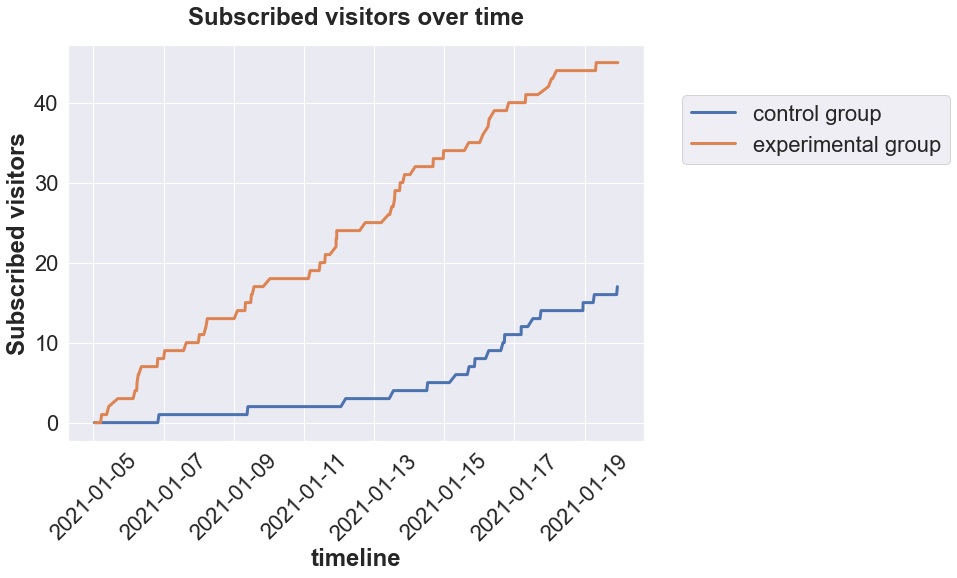

In [15]:
# Plot subscription percentage over time
fig = plt.figure(figsize=(8, 5.5))
ax = fig.add_axes([0,0,1,1])

ax.set_title('Subscribed visitors over time',fontweight='bold',pad=20)
ax.plot(design_A["timestamp"],design_A["cum_subs"],linewidth=3)
ax.plot(design_B["timestamp"],design_B["cum_subs"],linewidth=3)
plt.xticks( rotation = 45)
plt.ylabel('Subscribed visitors',fontweight='bold')
plt.xlabel("timeline",fontweight='bold')

ax.legend(labels=['control group', 'experimental group'],bbox_to_anchor=(1.55,0.9), loc=1)

By looking at the figure above, we can conclude that the total number of subscribers grew faster in the experimental group in comparison to what we see for the control group.

Interestingly, at some point, between the 15th and 17th of January the number of subscribers in the control group started to grow faster. Lets's check some information about those dates.

In [16]:
date=datetime.date(2021, 1, 15)
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
print(days[date.weekday()])

Friday


It turns out that this unusual increment in the subscription rate within the control group happend over a weekend (the 15th of January 2021 was Friday and the 17th of January 2021 was Sunday). Hovewer we will not deep dive into further researching this question, because it goes beyond the scope of this project.

Let's calculate the percentage of the users who joined and did not join the subscription for each group.

In [17]:
# Calculating the percentage of subscribed and not subscribed for ech group
perc=data.groupby("group").mean()["subscribed"].reset_index()
perc["not_subscribed"]=1-perc["subscribed"]

perc["subscribed"]=perc["subscribed"]*100
perc["not_subscribed"]=perc["not_subscribed"]*100

print(perc)

          group  subscribed  not_subscribed
0       control    7.203390       92.796610
1  experimental   19.067797       80.932203


As we can see, only 7.24% of the users from the control joined the subscription, whereas almost 19% of the users subscribed in the the experimental group. It looks like the new webpage design might have significantly improved the subscription rate.

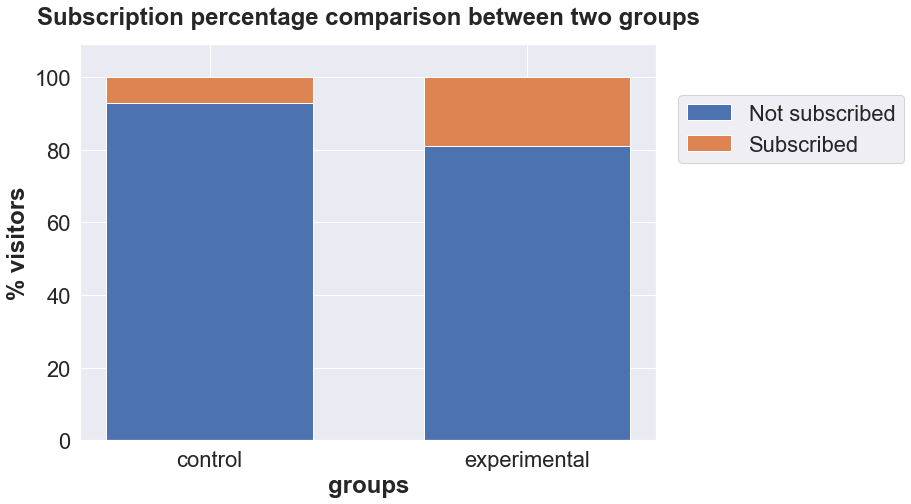

In [18]:
# Plot the subscription percentage comparison between two groups

fig = plt.figure(figsize=(8, 5.5))
ax = fig.add_axes([0,0,1,1])

ax.bar(perc["group"], perc["not_subscribed"],width=0.65)
ax.bar(perc["group"], perc["subscribed"],width=0.65,bottom=perc["not_subscribed"])

ax.set_ylabel('% visitors',fontweight='bold')
ax.set_xlabel("groups",fontweight='bold')
ax.set_title('Subscription percentage comparison between two groups',fontweight='bold',pad=20)
plt.ylim([0, 109])
ax.legend(labels=['Not subscribed', 'Subscribed'],bbox_to_anchor=(1.45,0.9), loc=1)

The percentage of subscribed users in the experimental group is higher than in the control group. But is this difference **statistically significant**?


## 5. Hypothesis testing

To answer this question we will test our null hypothesis stated in the section [Designing the experiment](#2.-Designing-the-experiment):
    
$H_0$ :   the subscription rates of the new design (Design B shown to the visitors from the experimental group) and the old design (Design A shown to the visitors from the control group) are the same and any existing difference between those rates is not statistically significant.
    
The alternative hypotheis $H_1$ would be that there is a statistically significant difference between the subscription rates in the two groups.

Given that the sizes of our samples are large enough, we can use z-test to test our $H_0$ hypothesis: wee will calculate the 𝑝 -value and confidence intervals useing the statsmodels.stats.proportion module.

In [19]:
# Making necessary import
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control = data[data['group'] == 'control']['subscribed']
experimental= data[data['group'] == 'experimental']['subscribed']

In [20]:
n_con = control.count()
n_exp = experimental.count()
successes = [control.sum(), experimental.sum()]
nobs = [n_con, n_exp]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_exp), (upper_con, upper_exp) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print('Z-Test Results:')
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.5f}')
print(f'95% confidence interval for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'95% confidence interval for experimental group: [{lower_exp:.3f}, {upper_exp:.3f}]')

Z-Test Results:
z statistic: -3.82
p-value: 0.00014
95% confidence interval for control group: [0.039, 0.105]
95% confidence interval for experimental group: [0.141, 0.241]



## 6. Conclusions

The $p$-value that we obtained is 0.00014 is significantly lower than $\alpha$=0.05, thus,  we can reject the null hypothesis $H_0$, which means that the new design leads to statistically significant increment in the opt-in subscription rate.


Also, if we look at the confidence intervals for the `control` and `experimental` groups ([0.039, 0.104], i.e. 3.9-10.4% and [0.139, 0.239], i.e. 13.9-23.9%), we can notice that:

* The confidence intervals do not crooss.
* The confidence interval for the `experimental` group includes our desired value of 15% of subscribers.

This means is that the new web page design resulted in a significant improvement of the subscription rate and that with the new webpage design we will probably will reach the desired amount of subscribers.

In conclusion, the reason why the web page design leads to a significant increment in the number of opt-in subscribers is probably that the new design only asks users for the minimum information needed for a subscription (user's email address), whereas the in the old web page design the user needed to provide more additional information to join the usbcription (the first and last names, and the telephone number). This additional information is obviously can be categorized as sensitive, and users might have doubts their privacy and security - they are more prone to not submitting the subscription form.